In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%pip install -q seaborn
import seaborn as sns # statistical data visualization

#-- plotly
%pip install -q chart-studio
import micropip
await micropip.install("ssl")
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [36]:
data = pd.read_csv('./data/jm1.csv')

### About this Software Defect Prediction Dataset

This is a Promise data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

### *Attribute Information:*

1. loc : numeric % McCabe's line count of code
2. v(g) : numeric % McCabe "cyclomatic complexity"
3. ev(g) : numeric % McCabe "essential complexity"
4. iv(g) : numeric % McCabe "design complexity"
5. n : numeric % Halstead total operators + operands
6. v : numeric % Halstead "volume"
7. l : numeric % Halstead "program length"
8. d : numeric % Halstead "difficulty"
9. i : numeric % Halstead "intelligence"
10. e : numeric % Halstead "effort"
11. b : numeric % Halstead
12. t : numeric % Halstead's time estimator
13. lOCode : numeric % Halstead's line count
14. lOComment : numeric % Halstead's count of lines of comments
15. lOBlank : numeric % Halstead's count of blank lines
16. lOCodeAndComment : numeric
17. uniq_Op : numeric % unique operators
18. uniq_Opnd : numeric % unique operands
19. total_Op : numeric % total operators
20. total_Opnd : numeric % total operands
21. branchCount : numeric % of the flow graph
22. defects : {false,true} % module has/has not one or more reported defects

### Data Discovery & Visualization

In [37]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [38]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [39]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10884,19.0,3.0,1.0,1.0,58.0,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [40]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
8620,26.0,2.0,1.0,2.0,89.0,456.51,0.12,8.02,56.92,3661.56,...,18,0,6,0,11,24,54,35,3,False
5410,51.0,7.0,1.0,4.0,150.0,792.81,0.04,26.27,30.18,20829.29,...,46,0,3,0,17,22,82,68,13,False
2611,9.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,1,False
4611,32.0,6.0,1.0,5.0,75.0,343.87,0.10,9.90,34.73,3404.33,...,27,0,3,0,9,15,42,33,11,False
4617,38.0,5.0,1.0,5.0,66.0,313.82,0.08,12.92,24.28,4055.55,...,30,0,6,0,14,13,42,24,6,False
2874,7.0,1.0,1.0,1.0,23.0,82.45,0.25,4.00,20.61,329.82,...,5,0,0,0,6,6,15,8,1,False
596,23.0,3.0,1.0,3.0,96.0,461.51,0.11,9.00,51.28,4153.55,...,16,0,4,1,8,20,51,45,5,True
6931,35.0,9.0,1.0,9.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,17,False
3891,19.0,6.0,1.0,6.0,58.0,232.00,0.06,16.67,13.92,3866.67,...,12,0,5,0,10,6,38,20,11,False
3196,168.0,44.0,42.0,34.0,540.0,3384.06,0.02,40.68,83.20,137649.97,...,120,15,23,6,23,54,349,191,87,False


In [41]:
data.shape #shows the number of rows and columns

(10885, 22)

In [42]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [43]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  8779
True :  2106


### -> Histogram

In [ ]:
%pip install --upgrade nbformat
#%pip install micropip
#micropip.install(..., keep_going=True)
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Covariance

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [44]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,0.899965,0.750564,0.921918,0.612858,0.803573,0.278119,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,0.759635,0.709501,0.799915,0.384506,0.538366,0.209811,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,0.445693,0.315538,0.454604,0.294208,0.338243,0.190911,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,0.743013,0.757702,0.775873,0.351583,0.541296,0.207028,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,0.983938,0.716536,0.944383,0.596374,0.798561,0.284391,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,0.999696,0.800000,0.962078,0.576844,0.792330,0.266537,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,-0.196147,-0.062026,-0.218373,-0.165885,-0.223670,-0.106117,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,0.751835,0.574298,0.768188,0.502121,0.637211,0.253793,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,0.598341,0.209268,0.563920,0.392551,0.572352,0.217810,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,0.799868,1.000000,0.809070,0.384806,0.600649,0.148693,0.086036


### -> Heatmap

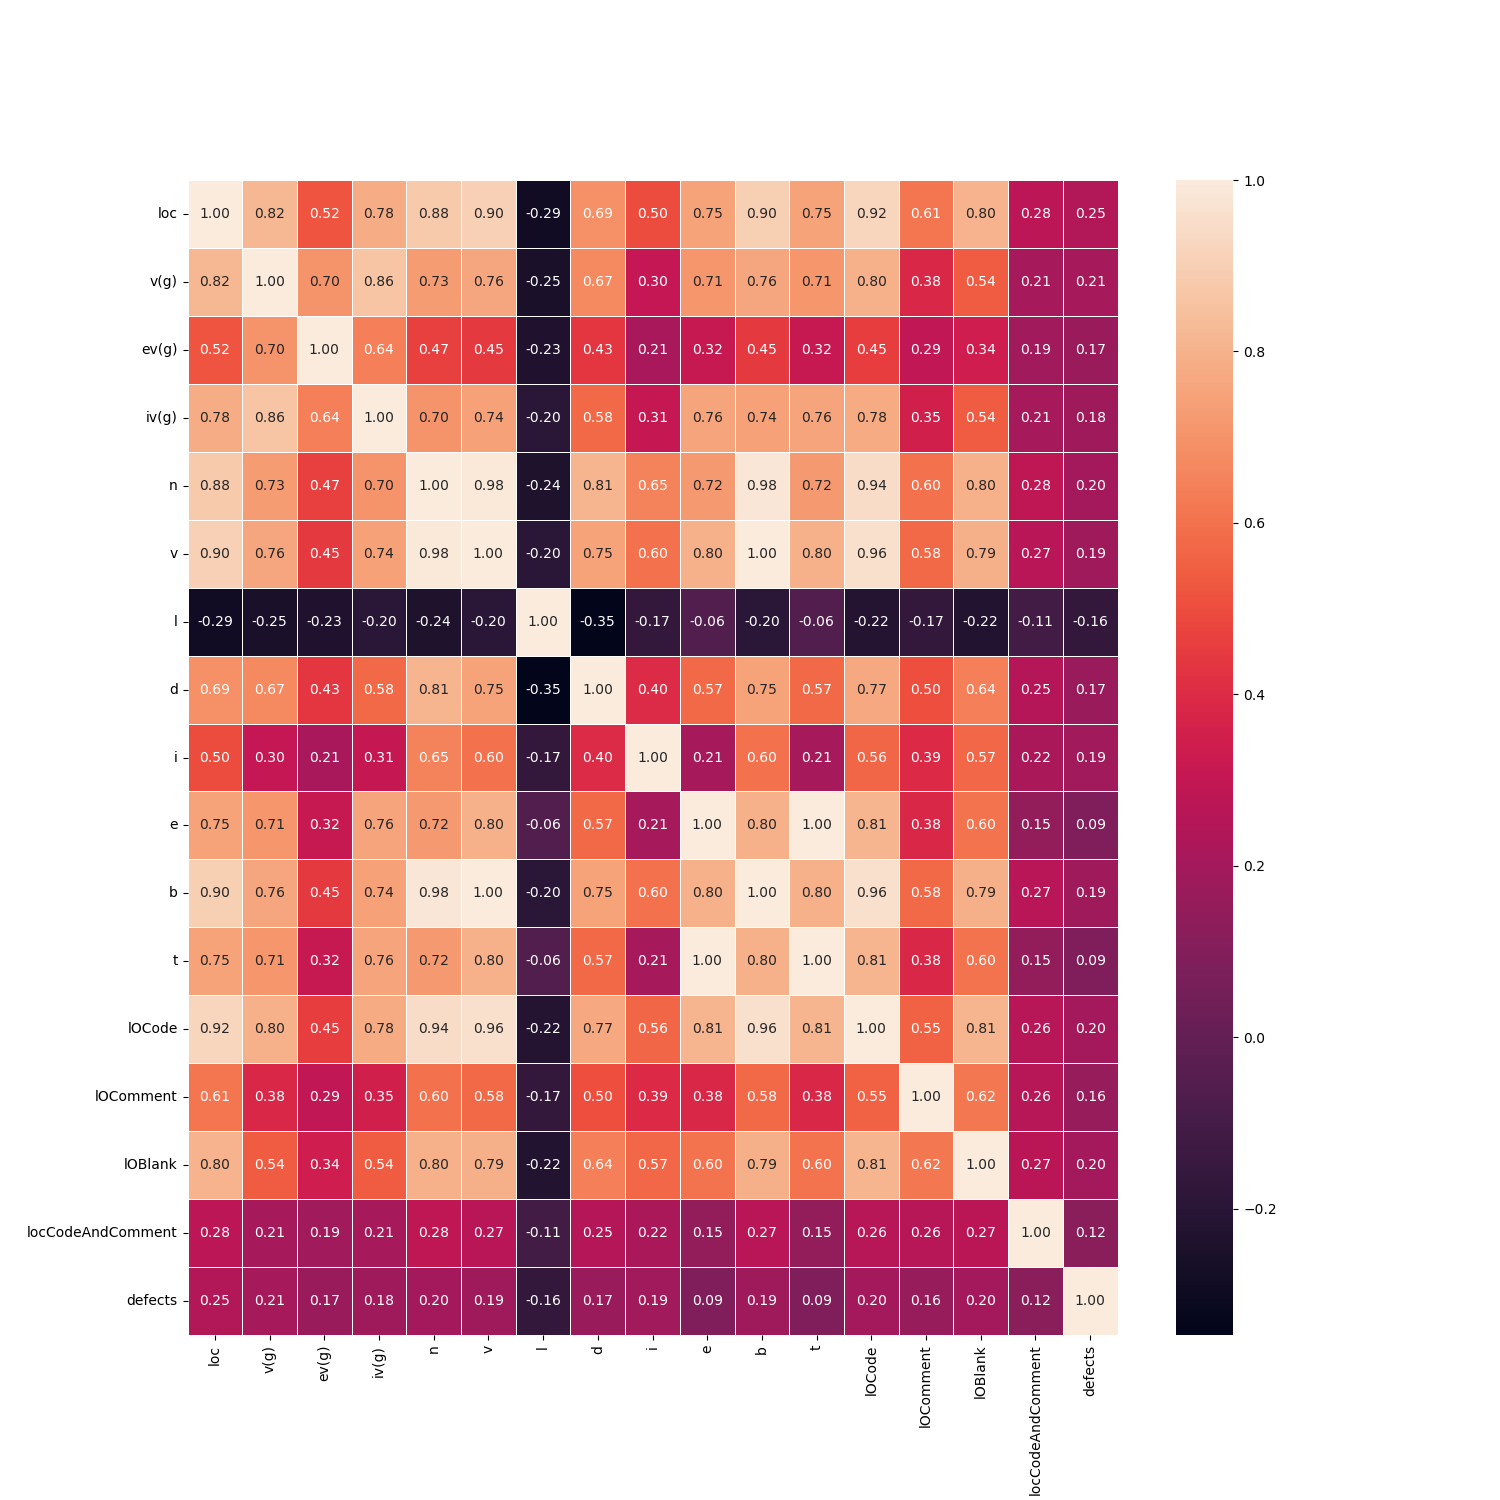

In [45]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)

The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)

### -> Scatter Plot

In [ ]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

#two attributes with high correlation v-b > just about 1

### -> Data Preprocessing

In [46]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

No missing value.

No data cleaning needed because the data is all important.

### -> Outlier Detection (Box Plot)

In [ ]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

Showing all information when clicking on plot (min, max, q1, q2, etc.).

### -> Feature Extraction

In [47]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [48]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,True,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17,36,112,86,13,True,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17,135,329,271,5,True,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11,16,76,50,7,True,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,10,15,30,22,7,False,Succesful
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,12,8,19,11,3,False,Succesful
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,18,15,59,44,7,False,Succesful
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,9,8,21,15,1,False,Succesful


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [50]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign     1725
Succesful    9160
dtype: int64

In [ ]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Data Normalization (Min-Max Normalization)

In [51]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17,36,112,86,13,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17,135,329,271,5,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11,16,76,50,7,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10,15,30,22,7,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12,8,19,11,3,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18,15,59,44,7,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9,8,21,15,1,False,Succesful,0.001820,0.001855


In [52]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


### -> Model Selection

### 1. Naive Bayes

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [55]:
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [56]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [57]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [58]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [59]:
cv_results

array([0.97818599, 0.98507463, 0.98277842, 0.97703789, 0.98277842,
       0.97474168, 0.98507463, 0.97474168, 0.96896552, 0.98390805])

In [60]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.979329 - Std : (0.005166)'

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.93      0.94      0.94       319
   Succesful       0.99      0.99      0.99      1858

    accuracy                           0.98      2177
   macro avg       0.96      0.97      0.96      2177
weighted avg       0.98      0.98      0.98      2177

[[ 301   18]
 [  22 1836]]
ACC:  0.9816260909508497


### 2. Decision Tree

In [62]:
from sklearn import tree

In [63]:
model = tree.DecisionTreeClassifier()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 319    0]
 [   1 1857]]
ACC:  0.9995406522737712


### 3. SVM


In [80]:
from sklearn import svm

In [81]:
model = svm.SVC(kernel='linear', C=0.01)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

SVM Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.97      0.99       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      0.99      0.99      2177
weighted avg       1.00      1.00      1.00      2177

[[ 311    8]
 [   0 1858]]
ACC:  0.99632521819017



### 4. Random Forest


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model=RandomForestClassifier(n_estimators=100)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forest Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forest Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.99      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 316    3]
 [   0 1858]]
ACC:  0.9986219568213137


## 5. KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model = KNeighborsClassifier(n_neighbors=5)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

    Redesign       0.98      0.96      0.97       319
   Succesful       0.99      1.00      0.99      1858

    accuracy                           0.99      2177
   macro avg       0.99      0.98      0.98      2177
weighted avg       0.99      0.99      0.99      2177

[[ 306   13]
 [   7 1851]]
ACC:  0.9908130454754249


## 6. Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Regression Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Logistic Regression Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.97      0.99       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      0.99      0.99      2177
weighted avg       1.00      1.00      1.00      2177

[[ 311    8]
 [   0 1858]]
ACC:  0.99632521819017
